In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("BreadBasket_DMS.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [4]:
data['Date time']= pd.to_datetime(data['Date']+' '+data['Time'])

In [5]:
data['Date time'].dt.year.value_counts()

2017    12732
2016     8561
Name: Date time, dtype: int64

In [6]:
data['Year Month']=data['Date time'].map(lambda x: 100*x.year + x.month)
data['Hour']=data['Date time'].dt.hour
data['Day']=data['Date time'].dt.weekday_name
data['Weekend vs Weekday'] = data['Date time'].apply(lambda x: 'Weekend' if x.dayofweek//5==1 else 'Weekday')

In [7]:
Transaction_by_month=data[['Year Month','Transaction']].groupby('Year Month',as_index=False).sum()

Text(0.5,1,'No of Transaction by month')

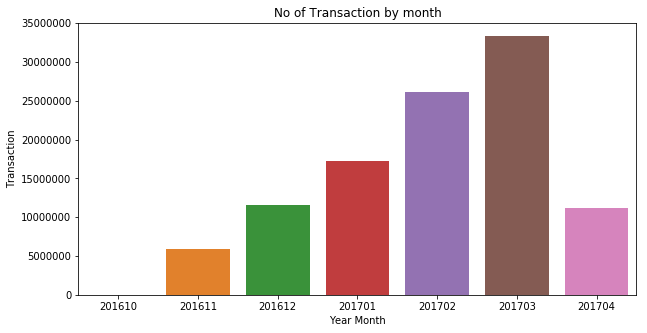

In [8]:
plt.figure(figsize=[10,5])
sns.barplot(x='Year Month',y='Transaction',data=Transaction_by_month)
plt.ticklabel_format(style='plain', axis='y')
plt.title('No of Transaction by month')

Text(0.5,1,'No of Transaction by Day')

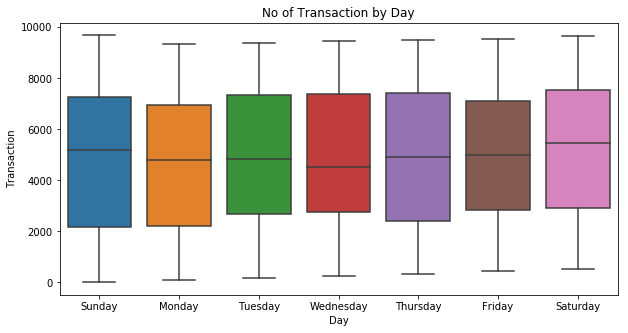

In [9]:
plt.figure(figsize=[10,5])
sns.boxplot(x='Day',y='Transaction',data=data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('No of Transaction by Day')

In [10]:
print('\n', 'Number of Unique Items in a dataset : ', data['Item'].nunique())
print( '\n', data['Item'].unique(), '\n')


 Number of Unique Items in a dataset :  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Sp

In [13]:
most_sold = data['Item'].value_counts().head(15)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64


Text(0.5,1,'Items Most Sold')

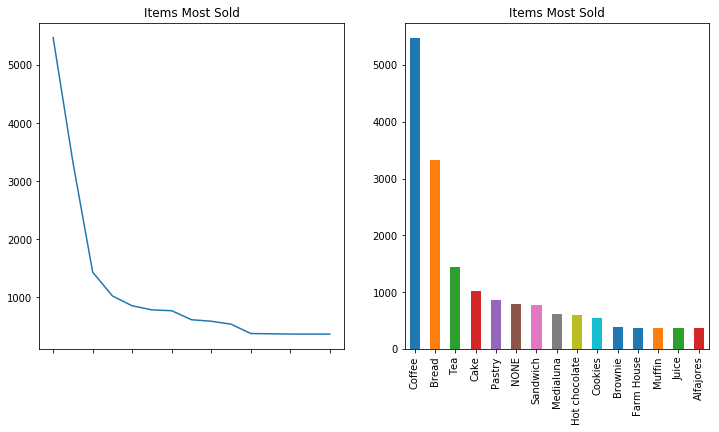

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')

plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')